# Figures

This notebook will be used to generate nice figures to be used in the report.

In [1]:
import numpy as np
import astropy
import matplotlib.pyplot as plt 
from matplotlib import cm

## Nico Keeghan
The following code will generate the isochrone figures.

In [2]:
from astropy.table import QTable

mags = QTable.read("obj_magnitudes.ecsv", format='ascii.ecsv')

In [3]:
# Code adapted from Girardi_UBVRI.ipynb on Moodle

class isochroneclass:
    def __init__(self):
            self.filename = "NULL                            "      # Relevant filename
            self.age = -99.0                                        # Age (log)
            self.m = []                                   # Star masses
            self.U = []                                   # Star U-band magnitudes
            self.B = []                                   # Star B-band magnitudes
            self.V = []                                   # Star V-band magnitudes
            self.R = []                                   # Star R-band magnitudes
            self.I = []                                   # Star I-band magnitudes

In [4]:
# Adapted from Girardi_UBVRI.ipynb on Moodle

fnames = ['isochrones/output545039620091_1e7_1e8.dat','isochrones/output410618231006_1e6_to_15e6.dat']
isochrones = {}

for fname in fnames:
    f=open(fname,"r")
    lines=f.readlines()

    curr_age = -99.0

    # iterate through lines of data file and add relevant information to ic object
    for x in lines:
        if x[0]!='#':
            split_line = x.split()
            age = float(split_line[2])
            if age != curr_age:
                if curr_age > -99.0:
                    isochrones[curr_age] = ic
                ic=isochroneclass()               # create new ic class
                curr_age = age                    # update current age
                ic.age = curr_age                 # set age for new isochrone
            ic.m.append(float(split_line[5]))     # mass of star
            ic.U.append(float(split_line[28]))    # U-band magnitude
            ic.B.append(float(split_line[29]))    # B-band magnitude
            ic.V.append(float(split_line[30]))    # V-band magnitude
            ic.R.append(float(split_line[31]))    # R-band magnitude
            ic.I.append(float(split_line[32]))    # I-band magnitude

    isochrones[curr_age] = ic

    f.close()



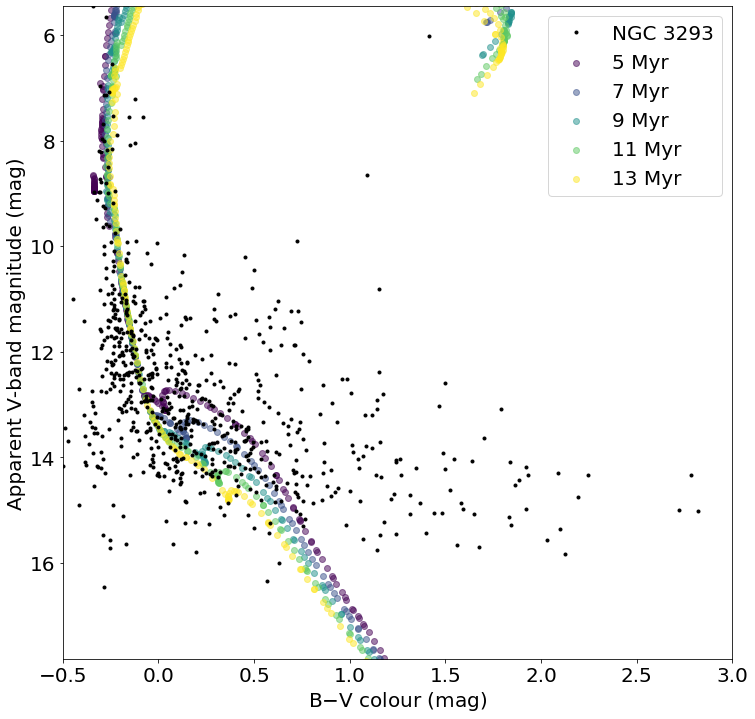

In [6]:
extinction = 1
reddening = extinction/3.1
offset = 11.8

px = mags['Bmag'] - mags['Vmag'] - reddening   # plot B-V colour on x-axis
py = mags['Vmag'] - extinction                 # plot V-band magnitude on y-axis


# isochrones of log(age) that we are interested in, corresponding to ages between 5 and 15 Myr.
ages = [6.69897, 6.8451, 6.95424, 7.04139, 7.11394]

# get some sequential colors to plot with to easily see the differences due to age
colors = cm.viridis(np.linspace(0,1,len(ages)))

fig, ax = plt.subplots(figsize = (12,12))

plt.rcParams.update({'font.size': 20})
plt.plot(px, py, '.', color='black',label='NGC 3293',zorder=10)

for age,color in zip(ages,colors):
    BV=np.array(isochrones[age].B)-np.array(isochrones[age].V)
    offsetV = np.array(isochrones[age].V) + offset

    plt.scatter(BV, offsetV, color=color, label='{:.0f} Myr'.format(10**(isochrones[age].age-6)),alpha=0.5)

plt.xlabel('B$-$V colour (mag)')
plt.ylabel('Apparent V-band magnitude (mag)')

# set y-axis limits so we can see the stars
plt.ylim(min(py),max(py))
plt.xlim(-0.5,3)

# invert y-axis so brighter stars are at the top
ax.invert_yaxis()

plt.legend(loc='upper right')

plt.savefig('isochrones.pdf')

plt.show()

In [7]:
import csv
removed_ids = []
with open('removed_ids.dat') as f:
    reader = csv.reader(f,delimiter='\n')
    for row in reader:
        row = row[0].strip(' ').strip(',')
        if row.isnumeric():
            removed_ids.append(int(row))

In [8]:
Mv_filtered = [mags['Vmag'][i] - extinction for i in range(len(mags['id'])) if (mags['id'][i] not in removed_ids)]
BV_filtered = [mags['Bmag'][i] - mags['Vmag'][i] - reddening for i in range(len(mags['id'])) if (mags['id'][i] not in removed_ids)]

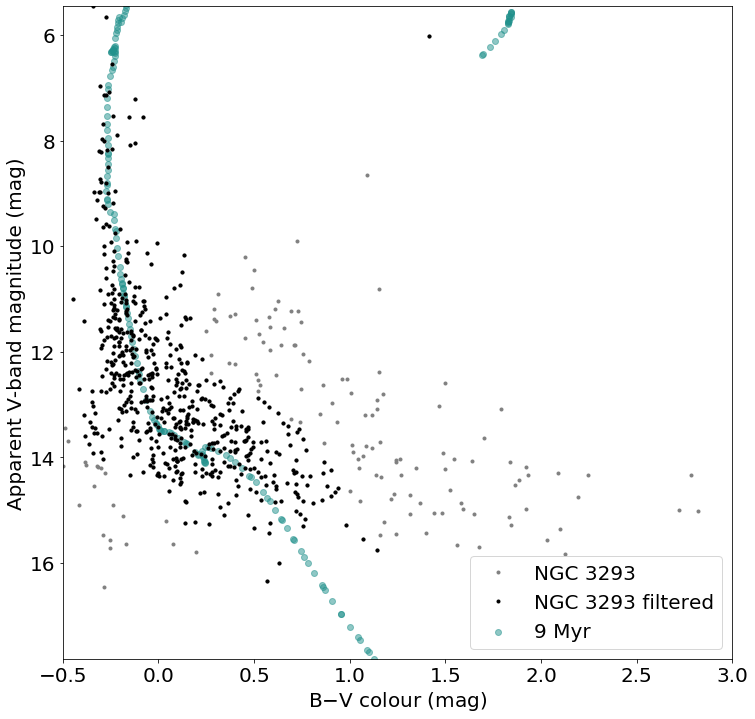

In [10]:
offset = 11.8

# isochrone of age = 9 Myr (10**age = 9*10**6).
age = 6.95424

fig, ax = plt.subplots(figsize = (12,12))

plt.rcParams.update({'font.size': 20})
plt.plot(px, py, '.', color='gray',label='NGC 3293')
plt.plot(BV_filtered, Mv_filtered, '.', color='black',label='NGC 3293 filtered')


BV=np.array(isochrones[age].B)-np.array(isochrones[age].V)
offsetV = np.array(isochrones[age].V) + offset

plt.scatter(BV, offsetV, color=colors[2], label='{:.0f} Myr'.format(10**(age-6)),alpha=0.5)

plt.xlabel('B$-$V colour (mag)')
plt.ylabel('Apparent V-band magnitude (mag)')

# set y-axis limits so we can see the stars
plt.ylim(min(py),max(py))
plt.xlim(-0.5,3)

# invert y-axis so brighter stars are at the top
ax.invert_yaxis()

plt.legend()

plt.savefig('best_fit_isochrone_with_filtering.pdf')

plt.show()